In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
# turn off pink boxes for demo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score, fbeta_score, make_scorer
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
from acquire import get_telco_data
from prepare import split_telco_data
from prep import prep_telco
from prepare import count_percentage_subplots
from prepare import model_metrics



# Telco Data has been renamed to df # 
## Plan ## 
## Outline of project ## 
The stakeholders at Telco have requested I as a data scientest to look more into the inner workings of the Telco data set. They desire more of a technical and mothodical approch to what drives churn in the daily workings at Telco. MAIN POINT where are the customers going 
1. What are the top drivers of customers leaving 

2. Create easy to read and to the point visualations 

3. What can we do better, what can we offer more to keep the customers from leaving 

## Goals 
1. Find and attack, inform what creates churn 

2. Create a ML classifcation model that helps and accurately depicts the levels of churn 

3. Present and deliver a report that everyone in the company can read and get on board with reducing churn 

# Acquire  #

In [2]:
df = get_telco_data()
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
X = df.drop(['churn'], axis = 1)
Y = df['churn']

In [4]:
x_trainer, x_tester, y_trainer, y_tester = train_test_split(X,Y, stratify = Y, test_size = 0.20, random_state= 42)

In [5]:
x_trainer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3793 to 5679
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5634 non-null   int64  
 1   payment_type_id           5634 non-null   int64  
 2   internet_service_type_id  5634 non-null   int64  
 3   contract_type_id          5634 non-null   int64  
 4   customer_id               5634 non-null   object 
 5   gender                    5634 non-null   object 
 6   senior_citizen            5634 non-null   int64  
 7   partner                   5634 non-null   object 
 8   dependents                5634 non-null   object 
 9   tenure                    5634 non-null   int64  
 10  phone_service             5634 non-null   object 
 11  multiple_lines            5634 non-null   object 
 12  online_security           5634 non-null   object 
 13  online_backup             5634 non-null   object 
 14  devic

In [6]:
x_trainer.describe()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,3510.116968,2.319311,1.870962,1.692226,0.161164,32.349663,65.032677
std,2044.454968,1.146825,0.735495,0.834452,0.367715,24.582641,30.023150
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.400000
25%,1733.250000,1.000000,1.000000,1.000000,0.000000,9.000000,38.312500
50%,3487.500000,2.000000,2.000000,1.000000,0.000000,29.000000,70.525000
75%,5300.500000,3.000000,2.000000,2.000000,0.000000,55.000000,89.900000
max,7042.000000,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [7]:
train = pd.concat([x_trainer,  y_trainer], axis = 1)
train.shape

(5634, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7043.0,3521.000000,2033.283305,0.00,1760.5,3521.00,5281.50,7042.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
df.tail()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check
7042,7042,1,1,3,9995-HOTOH,Male,0,Yes,Yes,63,...,No,Yes,Yes,No,59.00,3707.6,No,Two year,DSL,Electronic check


In [11]:
TotalCharges_missing = train[pd.to_numeric(train['total_charges'], errors='coerce').isnull()]
TotalCharges_missing

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,churn
3052,3052,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,...,No internet service,No internet service,No internet service,No,25.75,,Two year,None,Mailed check,No
2855,2855,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,...,Yes,Yes,No,No,73.35,,Two year,DSL,Mailed check,No
1731,1731,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,...,No internet service,No internet service,No internet service,No,20.00,,Two year,None,Mailed check,No
3118,3118,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,...,Yes,Yes,No,Yes,52.55,,Two year,DSL,Bank transfer (automatic),No
5433,5433,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,...,No internet service,No internet service,No internet service,No,19.85,,Two year,None,Mailed check,No
2250,2250,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,...,No internet service,No internet service,No internet service,No,25.35,,Two year,None,Mailed check,No
2176,2176,2,3,3,3115-CZMZD,Male,0,No,Yes,0,...,No internet service,No internet service,No internet service,No,20.25,,Two year,None,Mailed check,No
945,945,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,...,Yes,Yes,No,No,56.05,,Two year,DSL,Credit card (automatic),No
2025,2025,2,3,2,2923-ARZLG,Male,0,Yes,Yes,0,...,No internet service,No internet service,No internet service,Yes,19.70,,One year,None,Mailed check,No
1906,1906,3,1,3,2775-SEFEE,Male,0,No,Yes,0,...,Yes,No,No,Yes,61.90,,Two year,DSL,Bank transfer (automatic),No


In [12]:
for feature in train.columns:
  len_unique = len(train[feature].unique())
  if len_unique <= 10 :
    uniq = train[feature].unique()
  else:
    uniq = "too large to print all values.. some sample are" + str(train[feature][500:505].values)
  print("Feature",feature,"has",len_unique,"values -",uniq)

Feature Unnamed: 0 has 5634 values - too large to print all values.. some sample are[3985 5538 6581 5883 6547]
Feature payment_type_id has 4 values - [4 3 1 2]
Feature internet_service_type_id has 3 values - [2 3 1]
Feature contract_type_id has 3 values - [1 3 2]
Feature customer_id has 5634 values - too large to print all values.. some sample are['5619-PTMIK' '7799-DSEWS' '9359-JANWS' '8267-ZNYVZ' '9297-FVVDH']
Feature gender has 2 values - ['Female' 'Male']
Feature senior_citizen has 2 values - [0 1]
Feature partner has 2 values - ['Yes' 'No']
Feature dependents has 2 values - ['No' 'Yes']
Feature tenure has 73 values - too large to print all values.. some sample are[46 18 65 33 57]
Feature phone_service has 2 values - ['Yes' 'No']
Feature multiple_lines has 3 values - ['Yes' 'No' 'No phone service']
Feature online_security has 3 values - ['Yes' 'No internet service' 'No']
Feature online_backup has 3 values - ['Yes' 'No internet service' 'No']
Feature device_protection has 3 values -

In [13]:
train['total_services_opted'] = (train[[ 
 'phone_service',
 'multiple_lines',
 'internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']] == "Yes").sum(axis = 1)

In [14]:
TotalCharges_missing.index

Int64Index([3052, 2855, 1731, 3118, 5433, 2250, 2176, 945, 2025, 1906], dtype='int64')

In [15]:
for idx in TotalCharges_missing.index:
  train.loc[idx,'total_charges'] = train.loc[idx]['tenure'] * train.loc[idx]['monthly_charges']

In [16]:
train['total_charges'] = train['total_charges'].astype(str).astype(float)
train['total_charges'].dtype

dtype('float64')

# Prepare # 

### prep the data ###

### Importing functions from prepare.py and prep.py ### 

1. We have removed the nulls in the df, but have had to replace the blank information. 

2. There is some information that is not relivent and has not been include for example: customers with tenure = 0, just means they have not yet had tome to pay there bills 

3. First is a list of values that need to be adjusted so they will properly fit in the model 

## List to change ## 

In [17]:
df.customer_id.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

### Gender will change to Male = 1 and Female = 0 

In [18]:
df.gender.unique() 

array(['Female', 'Male'], dtype=object)

### Senior_citizen will be 1 = yes is a senior 0 = no is not a senior 

In [19]:
df.senior_citizen.unique()

array([0, 1])

### internet_service_type_id will equate to 1= DSL 2= Fiber optic 3 = None

In [20]:
df.internet_service_type_id.unique()

array([1, 2, 3])

### Contract type will equal 1 = month to month 2 = 1 year  3 = 2 year 

In [21]:
df.contract_type_id.unique()

array([2, 1, 3])

### Payment_type_id equates to 1 = Electronic Ck 2 = Mailed Ck 3 = Automatic bank transfer 4 = Credit automatic

In [22]:
df.payment_type_id.unique()

array([2, 1, 4, 3])

### Churn will change to if there is churn = 1 and if not = 0 

In [23]:
df.churn.unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df.partner.unique()

array(['Yes', 'No'], dtype=object)

## Functions to Create to get the Ml to correctly analize the data ## 

In [25]:
pd.crosstab(df.gender, train.gender)

gender,Female,Male
gender,,
Female,2772,0
Male,0,2862


In [26]:
pd.crosstab(df.senior_citizen, train.senior_citizen)

senior_citizen,0,1
senior_citizen,,
0,4726,0
1,0,908


In [27]:
pd.crosstab(df.churn, train.senior_citizen)

senior_citizen,0,1
churn,,
No,3612,527
Yes,1114,381


In [28]:
pd.crosstab(train.churn, df.churn)

churn,No,Yes
churn,,
No,4139,0
Yes,0,1495


In [29]:
pd.crosstab(df.internet_service_type, df.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
None,0,0,1526


In [30]:
pd.crosstab(df.internet_service_type, train.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,1934,0,0
Fiber optic,0,2493,0
None,0,0,1207


In [31]:
pd.crosstab(df.payment_type, df.internet_service_type_id)

internet_service_type_id,1,2,3
payment_type,,,
Bank transfer (automatic),566,646,332
Credit card (automatic),594,597,331
Electronic check,648,1595,122
Mailed check,613,258,741


In [32]:
pd.crosstab(df.payment_type, df.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [33]:
pd.crosstab(df.contract_type, df.payment_type_id)

payment_type_id,1,2,3,4
contract_type,,,,
Month-to-month,1850,893,589,543
One year,347,337,391,398
Two year,168,382,564,581


In [34]:
pd.crosstab(df.contract_type, df.contract_type_id)

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


## Data Exploration 

In [35]:
train

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,churn,total_services_opted
3793,3793,4,2,1,5334-JLAXU,Female,0,Yes,No,60,...,No,Yes,Yes,94.10,5475.90,Month-to-month,Fiber optic,Credit card (automatic),No,5
3192,3192,3,3,3,4573-JKNAE,Male,0,No,Yes,12,...,No internet service,No internet service,No,19.35,212.30,Two year,None,Bank transfer (automatic),No,1
4922,4922,1,2,1,6923-JHPMP,Female,0,No,No,2,...,No,No,Yes,80.45,137.10,Month-to-month,Fiber optic,Electronic check,No,3
3926,3926,4,1,2,5524-KHNJP,Male,0,Yes,Yes,33,...,Yes,Yes,No,74.75,2453.30,One year,DSL,Credit card (automatic),No,5
3859,3859,2,2,1,5433-KYGHE,Female,0,No,Yes,14,...,No,No,Yes,86.00,1164.05,Month-to-month,Fiber optic,Mailed check,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,6331,3,3,2,8966-OIQHG,Female,0,Yes,Yes,22,...,No internet service,No internet service,No,20.75,452.35,One year,None,Bank transfer (automatic),No,1
6146,6146,1,2,1,8708-XPXHZ,Female,0,Yes,Yes,42,...,Yes,Yes,Yes,94.20,4186.30,Month-to-month,Fiber optic,Electronic check,Yes,4
4485,4485,1,2,1,6331-EWIEB,Male,0,No,No,20,...,Yes,No,Yes,85.25,1734.50,Month-to-month,Fiber optic,Electronic check,Yes,3
2739,2739,2,3,3,3896-ZVNET,Female,0,Yes,Yes,24,...,No internet service,No internet service,No,24.70,571.75,Two year,None,Mailed check,No,2


In [36]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5634.0,3510.116968,2044.454968,0.0,1733.2500,3487.500,5300.5,7042.00
payment_type_id,5634.0,2.319311,1.146825,1.0,1.0000,2.000,3.0,4.00
internet_service_type_id,5634.0,1.870962,0.735495,1.0,1.0000,2.000,2.0,3.00
contract_type_id,5634.0,1.692226,0.834452,1.0,1.0000,1.000,2.0,3.00
senior_citizen,5634.0,0.161164,0.367715,0.0,0.0000,0.000,0.0,1.00
tenure,5634.0,32.349663,24.582641,0.0,9.0000,29.000,55.0,72.00
monthly_charges,5634.0,65.032677,30.023150,18.4,38.3125,70.525,89.9,118.75
total_charges,5634.0,2291.430325,2277.156444,0.0,393.2250,1395.525,3832.9,8684.80
total_services_opted,5634.0,3.374867,2.057934,0.0,2.0000,3.000,5.0,8.00


In [37]:
train.churn.value_counts()

No     4139
Yes    1495
Name: churn, dtype: int64

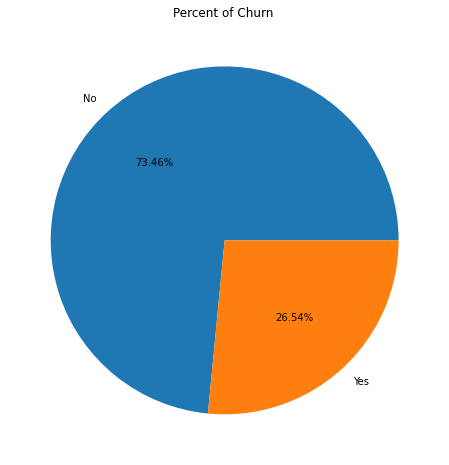

In [38]:
plt.figure(figsize=(12, 8))
plt.pie(train.churn.value_counts()/train.shape[0], labels = train.churn.unique(), autopct='%1.2f%%')
plt.title("Percent of Churn ")
plt.show()

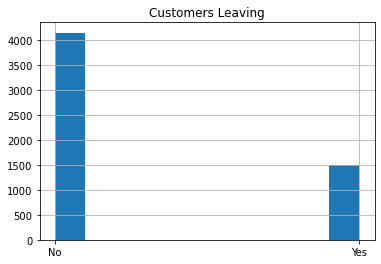

In [39]:
plt.title('Customers Leaving')
train.churn.hist()
plt.show()

### As we can see a little over 26% of our clients have churned  and over 1000 customers a month 

In [40]:
x_trainer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3793 to 5679
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5634 non-null   int64  
 1   payment_type_id           5634 non-null   int64  
 2   internet_service_type_id  5634 non-null   int64  
 3   contract_type_id          5634 non-null   int64  
 4   customer_id               5634 non-null   object 
 5   gender                    5634 non-null   object 
 6   senior_citizen            5634 non-null   int64  
 7   partner                   5634 non-null   object 
 8   dependents                5634 non-null   object 
 9   tenure                    5634 non-null   int64  
 10  phone_service             5634 non-null   object 
 11  multiple_lines            5634 non-null   object 
 12  online_security           5634 non-null   object 
 13  online_backup             5634 non-null   object 
 14  devic

In [41]:
categorical_features= list(x_trainer.columns)
for con in ['tenure', 'monthly_charges', 'total_charges']:
  categorical_features.remove(con)

In [42]:
def ChiSquare( data, target, categorical_features):
    
    # Creating an empty list of final selected predictors
    RemoveFeatures=[]

    print('The ChiSquare result are : \n')
    for feature in categorical_features:
        CrossTabResult=pd.crosstab(index = data[target], columns=data[feature])
        pvalue = stats.chi2_contingency(CrossTabResult)[1]
        # print(Result)
        # If the ChiSquare P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target, '| P-Value:', pvalue)
        else:
            print(feature, 'is \033[1m NOT \033[0m correlated with', target, '| P-Value:', pvalue)   
            RemoveFeatures.append(feature)     
    print("\n\n")
    return(RemoveFeatures)

In [43]:
remove_features_cat = ChiSquare(data = train, target = 'churn', categorical_features = categorical_features)
print("Features to be removed are :",remove_features_cat)

The ChiSquare result are : 

Unnamed: 0 is  NOT  correlated with churn | P-Value: 0.49373617532388264
payment_type_id is correlated with churn | P-Value: 5.647611258551019e-114
internet_service_type_id is correlated with churn | P-Value: 8.427816774330557e-125
contract_type_id is correlated with churn | P-Value: 7.093651137576845e-209
customer_id is  NOT  correlated with churn | P-Value: 0.49373617532388264
gender is  NOT  correlated with churn | P-Value: 0.2529514127494371
senior_citizen is correlated with churn | P-Value: 2.266872408486358e-30
partner is correlated with churn | P-Value: 5.182259528300393e-30
dependents is correlated with churn | P-Value: 2.736252215108652e-32
phone_service is  NOT  correlated with churn | P-Value: 0.543556376378924
multiple_lines is correlated with churn | P-Value: 0.005353617194158028
online_security is correlated with churn | P-Value: 3.425596088225168e-144
online_backup is correlated with churn | P-Value: 2.0717423540103247e-105
device_protection 

In [44]:
x_trainer.drop(remove_features_cat, axis = 1, inplace = True)
x_trainer.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type
3793,4,2,1,0,Yes,No,60,Yes,Yes,Yes,No,No,No,Yes,Yes,94.10,5475.9,Month-to-month,Fiber optic,Credit card (automatic)
3192,3,3,3,0,No,Yes,12,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.35,212.3,Two year,None,Bank transfer (automatic)
4922,1,2,1,0,No,No,2,No,Yes,No,Yes,No,No,No,Yes,80.45,137.1,Month-to-month,Fiber optic,Electronic check


In [45]:
y_trainer = y_trainer.map({'Yes':1,'No':0})
y_trainer.head(3)

3793    0
3192    0
4922    0
Name: churn, dtype: int64

In [46]:
y_tester = y_tester.map({'Yes':1,'No':0})

In [47]:
def T_Test(data, target, Continuous_features):

    RemoveFeatures=[]
    
    print('The T-Test result are : ')
    for feature in Continuous_features:
        feature_data = data.groupby(target)[feature].apply(list)
        pvalue = ttest_ind(*feature_data)[1]
        # If the T-Test P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target , '| P-Value:', pvalue)
        else:
            print(feature, 'is NOT correlated with', target , '| P-Value:', pvalue)
            RemoveFeatures.append(feature)
    print("\n\n")
    return(RemoveFeatures)

In [48]:
Continuous_features =['tenure', 'monthly_charges', 'total_charges']
remove_features_con = T_Test(data=train, target='churn', Continuous_features = Continuous_features)
print("Features to be removed are :",remove_features_con)

The T-Test result are : 
tenure is correlated with churn | P-Value: 5.7014538499314035e-164
monthly_charges is correlated with churn | P-Value: 2.082231102973894e-46
total_charges is correlated with churn | P-Value: 1.910886453749038e-52



Features to be removed are : []


In [49]:
x_trainer.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type
3793,4,2,1,0,Yes,No,60,Yes,Yes,Yes,No,No,No,Yes,Yes,94.10,5475.9,Month-to-month,Fiber optic,Credit card (automatic)
3192,3,3,3,0,No,Yes,12,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.35,212.3,Two year,None,Bank transfer (automatic)
4922,1,2,1,0,No,No,2,No,Yes,No,Yes,No,No,No,Yes,80.45,137.1,Month-to-month,Fiber optic,Electronic check
3926,4,1,2,0,Yes,Yes,33,No,Yes,No,Yes,No,Yes,Yes,No,74.75,2453.3,One year,DSL,Credit card (automatic)
3859,2,2,1,0,No,Yes,14,Yes,Yes,No,No,Yes,No,No,Yes,86.00,1164.05,Month-to-month,Fiber optic,Mailed check


In [50]:
x_tester.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type
455,455,1,1,1,0668-OGMHD,Female,0,Yes,No,21,...,No,No,No,No,No,28.50,629.35,Month-to-month,DSL,Electronic check
2301,2301,1,2,1,3292-PBZEJ,Male,1,No,No,11,...,Yes,Yes,Yes,Yes,Yes,111.40,1183.05,Month-to-month,Fiber optic,Electronic check
2255,2255,1,2,1,3223-DWFIO,Male,1,No,No,4,...,No,No,No,No,No,69.35,261.65,Month-to-month,Fiber optic,Electronic check
4527,4527,2,3,1,6377-KSLXC,Male,0,No,No,5,...,No internet service,No internet service,No internet service,No internet service,No,19.95,107.05,Month-to-month,None,Mailed check
3812,3812,3,1,3,5360-XGYAZ,Male,0,Yes,Yes,72,...,Yes,Yes,Yes,Yes,Yes,65.65,4664.5,Two year,DSL,Bank transfer (automatic)


In [51]:
df.multiple_lines.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [52]:
for feature in ['partner', 'dependents', 'paperless_billing']:
    x_trainer[feature] = x_trainer[feature].map({'Yes':1,'No':0})
    x_tester[feature] = x_tester[feature].map({'Yes':1,'No':0})
x_trainer['multiple_lines'] = x_trainer.multiple_lines.map({'Yes':1,'No':0,'No phone service':0})
x_trainer['contract_type'] = x_trainer.contract_type.map({'One year':2,'Two year':3,'Month-to-month':1})

x_tester['multiple_lines'] = x_tester.multiple_lines.map({'Yes':1,'No':0,'No phone service':0})
x_tester['contract_type'] = x_tester.contract_type.map({'One year':2,'Two year':3,'Month-to-month':1})

for feature in ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']:
    x_trainer[feature] = x_trainer[feature].map({'Yes':1,'No':0,'No internet service':0})
    x_tester[feature] = x_tester[feature].map({'Yes':1,'No':0,'No internet service':0})

In [53]:
x_trainer = pd.get_dummies(x_trainer, columns= ['internet_service_type','payment_type'], drop_first = True)
x_tester = pd.get_dummies(x_tester, columns= ['internet_service_type','payment_type'], drop_first = True)

In [54]:
TotalCharges_missing_x_train = x_trainer[ pd.to_numeric(x_trainer['total_charges'], errors='coerce').isnull()]
for idx in TotalCharges_missing_x_train.index:
  x_trainer.loc[idx,'total_charges'] = x_trainer.loc[idx]['tenure'] * x_trainer.loc[idx]['monthly_charges']
x_trainer['total_charges'] = x_trainer['total_charges'].astype(str).astype(float)
x_trainer['total_charges'].dtype

dtype('float64')

In [55]:
TotalCharges_missing_x_test = x_tester[ pd.to_numeric(x_tester['total_charges'], errors='coerce').isnull()]
for idx in TotalCharges_missing_x_test.index:
  x_tester.loc[idx,'total_charges'] = x_tester.loc[idx]['tenure'] * x_tester.loc[idx]['monthly_charges']
x_tester['total_charges'] = x_tester['total_charges'].astype(str).astype(float)
x_tester['total_charges'].dtype

dtype('float64')

In [56]:
scaler = MinMaxScaler()
minmax_scaler = scaler.fit(x_trainer[['tenure','monthly_charges','total_charges']])
x_trainer[['tenure','monthly_charges','total_charges']] = minmax_scaler.transform(x_trainer[['tenure','monthly_charges','total_charges']])
x_trainer.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3793,4,2,1,0,1,0,0.833333,1,1,1,...,1,1,0.754360,0.630515,1,1,0,1,0,0
3192,3,3,3,0,0,1,0.166667,0,0,0,...,0,0,0.009467,0.024445,3,0,1,0,0,0
4922,1,2,1,0,0,0,0.027778,0,1,0,...,0,1,0.618336,0.015786,1,1,0,0,1,0


In [57]:
train.drop('total_services_opted', axis = 1, inplace = True)

In [58]:
categorical_features = []
numerical_features = []
for feature in train.columns:
  if train[feature].dtype == 'O':
    categorical_features.append(feature)
  else:
    numerical_features.append(feature)
numerical_features.remove("senior_citizen")
categorical_features.insert(4, "senior_citizen") # Put 'senior_citizen' in 4th place
categorical_features

['customer_id',
 'gender',
 'partner',
 'dependents',
 'senior_citizen',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn']

# I will present a number of visuals based off of our data to prove my evalutions 

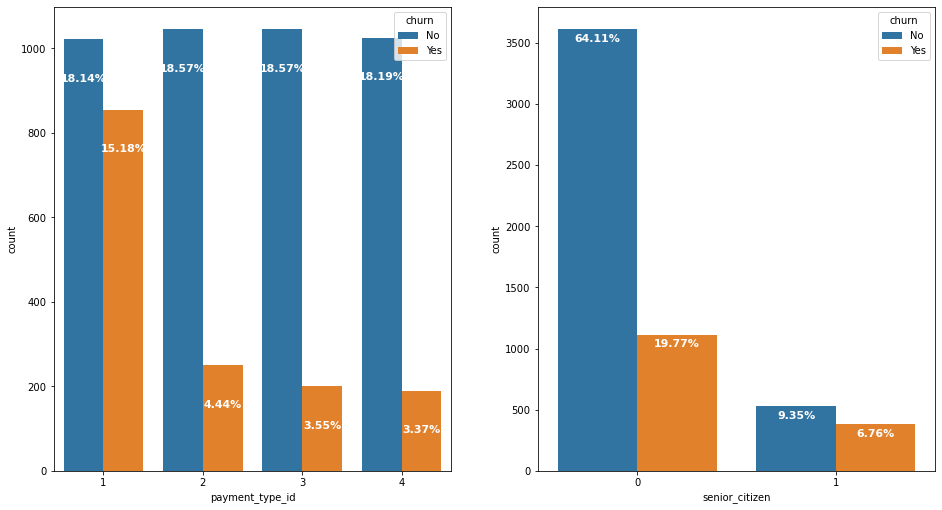

In [59]:
count_percentage_subplots(['payment_type_id', 'senior_citizen'],1,2, 'churn', train, figsize_row = 14, figsize_col = 8 )

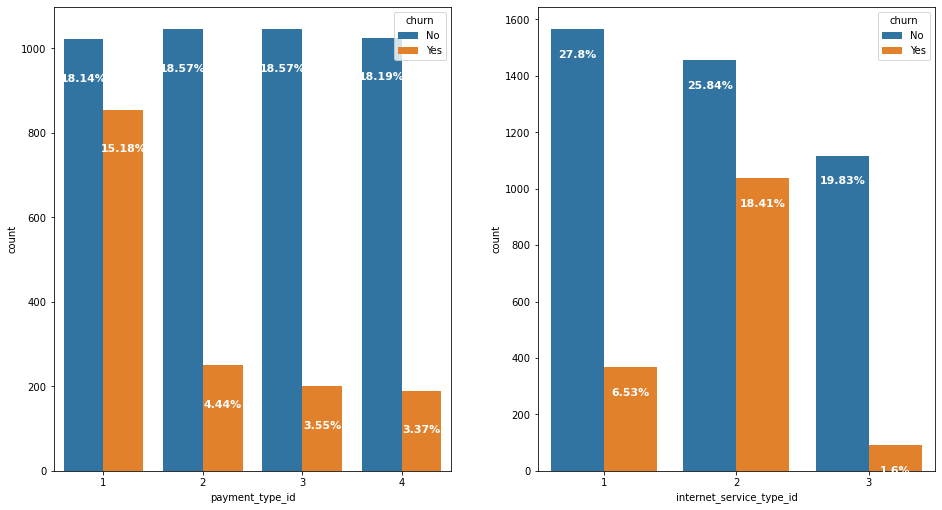

In [60]:
count_percentage_subplots(['payment_type_id', 'internet_service_type_id'],1,2, 'churn', train, figsize_row = 14, figsize_col = 8 )

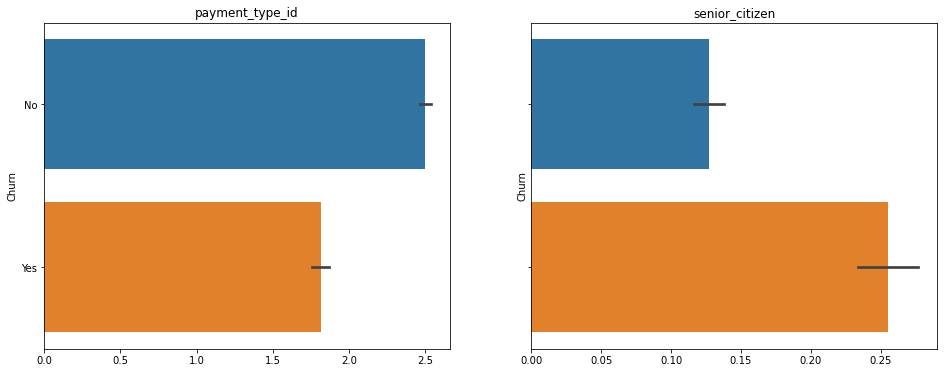

In [61]:
Change = ['payment_type_id', 'senior_citizen']
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(16, 6), sharey = True)
for i, feature in enumerate(Change):
    sns.barplot(feature,'churn', data = train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn')
    ax[i].set_title(feature)
    

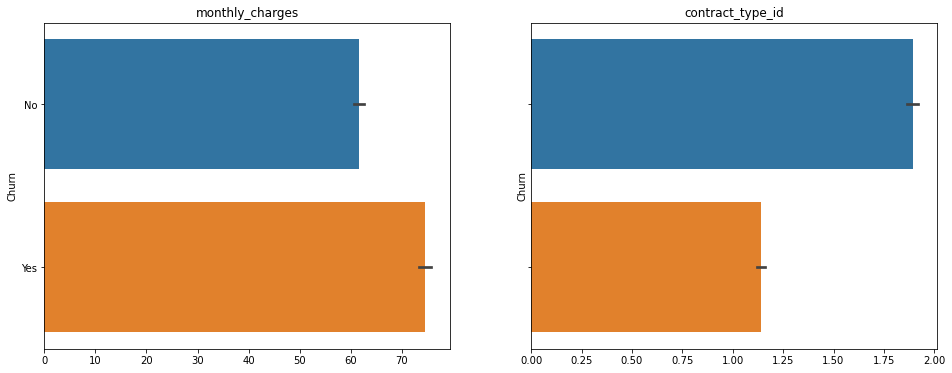

In [62]:
Change = ['monthly_charges', 'contract_type_id']
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(16, 6), sharey = True)
for i, feature in enumerate(Change):
    sns.barplot(feature,'churn', data = train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn')
    ax[i].set_title(feature)
    

In [63]:
#mapplot.annot#

# Stats Breakdown of Change 

In [64]:
alpha = 0.01

## Payment type
### Intital Hypotheses

_(H_O)_:Rate of churn is not dependent on the payment type 


_(H_a)_:Rate of churn is dependent on the payment type 

In [65]:
churn_payment_type = pd.crosstab(train.payment_type_id, train.churn)
churn_payment_type

churn,No,Yes
payment_type_id,,
1,1022,855
2,1046,250
3,1046,200
4,1025,190


In [66]:
chi2, p_payment , degf, expected_payment = stats.chi2_contingency(churn_payment_type)
print(expected_payment)
print(f"p-val: {p_payment}")

[[1378.93201988  498.06798012]
 [ 952.10223642  343.89776358]
 [ 915.36989705  330.63010295]
 [ 892.59584665  322.40415335]]
p-val: 5.647611258551019e-114


In [67]:
if p_payment < alpha:
    print("Rate of churn is not dependent on the payment type.")
else:
    print("Rate of churn is dependent on the payment type." )

Rate of churn is not dependent on the payment type.


##  Contract_type_id

### Intital Hypotheses

_(H_O)_:Rate of churn is not dependent on the contract_type 


_(H_a)_:Rate of churn is dependent on the contract_type 



In [68]:
n_contract_type = pd.crosstab(train.contract_type_id, train.churn)
n_contract_type

churn,No,Yes
contract_type_id,,
1,1769,1326
2,1048,130
3,1322,39


In [69]:
chi2, p_n, degf, expected_n = stats.chi2_contingency(n_contract_type)
print(expected_n)
print(f"p-val: {p_n}")

[[2273.73180689  821.26819311]
 [ 865.41391551  312.58608449]
 [ 999.8542776   361.1457224 ]]
p-val: 7.093651137576845e-209


In [70]:
if p_n < alpha:
    print("Rate of churn is not dependent on contract type.")
else:
    print("Rate of churn is dependent on contract type.")

Rate of churn is not dependent on contract type.


## Senior_Citizen

### Intital Hypotheses

_(H_O)_:Rate of churn is not dependent on the Senior_Citizen


_(H_a)_:Rate of churn is dependent on the Senior_Citizen



In [71]:
o_senior = pd.crosstab(train.senior_citizen, train.churn)
o_senior

churn,No,Yes
senior_citizen,,
0,3612,1114
1,527,381


In [72]:
chi2, p_o, degf, expected_o = stats.chi2_contingency(o_senior)
print(expected_o)
print(f"p-val: {p_o}")

[[3471.94071707 1254.05928293]
 [ 667.05928293  240.94071707]]
p-val: 2.266872408486358e-30


In [73]:
if p_o < alpha:
    print("Rate of churn is not dependent on senior_citizen.")
else:
    print("Rate of churn is dependent on senior_citizen.")

Rate of churn is not dependent on senior_citizen.


## internet_service_type_id

### Intital Hypotheses

_(H_O)_:Rate of churn is not dependent on the internet_service_type_id

_(H_a)_:Rate of churn is dependent on the internet_service_type_id

In [74]:
t_internet_service_type = pd.crosstab(train.internet_service_type_id, train.churn)
t_internet_service_type

churn,No,Yes
internet_service_type_id,,
1,1566,368
2,1456,1037
3,1117,90


In [75]:
chi2, p_t, degf, expected_t = stats.chi2_contingency(t_internet_service_type)
print(expected_t)
print(f"p-val: {p_t}")

[[1420.80688676  513.19311324]
 [1831.47444089  661.52555911]
 [ 886.71867235  320.28132765]]
p-val: 8.427816774331037e-125


In [76]:
if p_t < alpha:
    print("Rate of churn is not dependent on internet_service_type_id.")
else:
    print("Rate of churn is dependent on internet_service_type_id.")

Rate of churn is not dependent on internet_service_type_id.


In [77]:
categorical_features= list(x_trainer.columns)
for con in ['tenure', 'monthly_charges', 'total_charges']:
  categorical_features.remove(con)

In [78]:
def ChiSquare( data, target, categorical_features):
    
    # Creating an empty list of final selected predictors
    RemoveFeatures=[]

    print('The ChiSquare result are : \n')
    for feature in categorical_features:
        CrossTabResult=pd.crosstab(index = data[target], columns=data[feature])
        pvalue = chi2_contingency(CrossTabResult)[1]
        # print(Result)
        # If the ChiSquare P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target, '| P-Value:', pvalue)
        else:
            print(feature, 'is \033[1m NOT \033[0m correlated with', target, '| P-Value:', pvalue)   
            RemoveFeatures.append(feature)     
    print("\n\n")
    return(RemoveFeatures)

# Modeling 

In [79]:
def plot_confusion_matrix(y_tester, pred):
  cm = confusion_matrix(y_tester, pred)
  
  df_cm = pd.DataFrame(cm, [0,1], [0,1])
  plt.figure(figsize=(5,3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=True, fmt='g', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
  plt.title('Confusion Matrix\n', y=1.1)
  plt.ylabel('Actual label\n')
  plt.xlabel('Predicted label\n')

  plt.show()

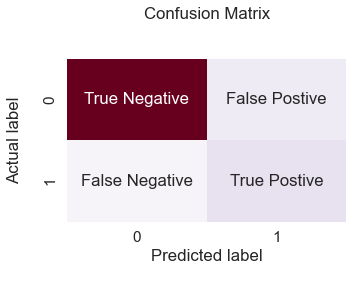

In [80]:
# the above function will return confusion matrix with values in the following format 
df_cm = pd.DataFrame([[1000,200],[150,250]],[0,1], [0,1])
annot_arr = np.array([['True Negative','False Postive'],['False Negative','True Postive']], dtype = str)
plt.figure(figsize=(5,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=annot_arr, fmt='s', cbar=False, cmap="PuRd") # font size , annot_kws={"size": 16}
plt.title('Confusion Matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
plt.show()

## Rules for how our models will be built and trained and evaluated
 
### _This dataset is tricky, and all our Hypotheses came back not the cause of churn .Our main objective is to find all the customers who churn. So True Positive is more important and we will take the F2-score as a weight.The F2 puts more attention on minimizing false negatives than minimizing false positives._ 


In [81]:
F2_score = make_scorer(fbeta_score, beta=2) 

In [82]:
model_performance_after_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [83]:
def model_metrics(table_name,model_name, y_tester, pred, print_cm , print_cr):
  if print_cm == True:
    plot_confusion_matrix(y_tester, pred)
    print("\n")
  if print_cr == True:
    print(classification_report(y_tester, pred),"\n")

  acc = round( accuracy_score(y_tester, pred),4)
  precision = round(precision_score(y_tester, pred),4)
  recall = round(recall_score(y_tester, pred),4)
  f1 = round(f1_score(y_tester, pred),4)
  f2 = round(fbeta_score(y_tester, pred, beta = 2),4)

  table_name.loc[table_name.shape[0]] = [model_name ,acc, precision, recall, f1, f2]

In [84]:
model_performance_without_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [85]:
model_performance_after_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [86]:
models_without_hp = []

models_without_hp.append(('Logistic Regression', LogisticRegression(random_state = 42)))

models_without_hp.append(('Linear SVC', SVC(kernel = 'linear', random_state = 42)))

models_without_hp.append(('Kernal SVC', SVC(kernel = 'rbf', random_state = 42)))

models_without_hp.append(('KNN', KNeighborsClassifier()))

models_without_hp.append(('Random Forest', RandomForestClassifier(random_state = 42)))

models_without_hp.append(('Adaboost', AdaBoostClassifier(random_state = 42)))

In [87]:
x_trainer.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,...,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3793,4,2,1,0,1,0,0.833333,1,1,1,...,1,1,0.754360,0.630515,1,1,0,1,0,0
3192,3,3,3,0,0,1,0.166667,0,0,0,...,0,0,0.009467,0.024445,3,0,1,0,0,0
4922,1,2,1,0,0,0,0.027778,0,1,0,...,0,1,0.618336,0.015786,1,1,0,0,1,0
3926,4,1,2,0,1,1,0.458333,0,1,0,...,1,0,0.561535,0.282482,2,0,0,1,0,0
3859,2,2,1,0,0,1,0.194444,1,1,0,...,0,1,0.673642,0.134033,1,1,0,0,0,1


In [88]:
x_tester.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
455,455,1,1,1,0668-OGMHD,Female,0,1,0,21,...,0,0,28.50,629.35,1,0,0,0,1,0
2301,2301,1,2,1,3292-PBZEJ,Male,1,0,0,11,...,1,1,111.40,1183.05,1,1,0,0,1,0
2255,2255,1,2,1,3223-DWFIO,Male,1,0,0,4,...,0,0,69.35,261.65,1,1,0,0,1,0
4527,4527,2,3,1,6377-KSLXC,Male,0,0,0,5,...,0,0,19.95,107.05,1,0,1,0,0,1
3812,3812,3,1,3,5360-XGYAZ,Male,0,1,1,72,...,1,1,65.65,4664.50,3,0,0,0,0,0


In [89]:
x_tester.drop('customer_id',  axis = 1, inplace = True)

In [90]:
x_tester.drop('gender',  axis = 1, inplace = True)

In [91]:
x_tester.drop('phone_service',  axis = 1, inplace = True)

In [92]:
x_tester.drop('Unnamed: 0',  axis = 1, inplace = True)

In [93]:
for name, model in models_without_hp:
  
  md = model.fit(x_trainer, y_trainer)
  pred = md.predict(x_tester)

  model_metrics(model_performance_without_hypertuning, name, y_tester, pred, False, False)

model_performance_without_hypertuning

,model_name,acc,precision,recall,f1,f2
0,Logistic Regression,0.2484,0.2339,0.8048,0.3624,0.5408
1,Linear SVC,0.7346,0.0000,0.0000,0.0000,0.0000
2,Kernal SVC,0.7346,0.0000,0.0000,0.0000,0.0000
3,KNN,0.7331,0.2500,0.0027,0.0053,0.0033
4,Random Forest,0.7339,0.4921,0.0829,0.1419,0.0994
5,Adaboost,0.2661,0.2656,1.0000,0.4198,0.6439


In [94]:
log_reg = LogisticRegression(random_state = 42, max_iter= 1000)

param_dist = {
    'C' : [0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty' : ['l1', 'l2',None]
}

log_reg_hp =  RandomizedSearchCV(log_reg , param_distributions = param_dist ,  scoring = F2_score , cv = 5, random_state= 42)
result1 = log_reg_hp.fit(x_trainer, y_trainer)

In [95]:
pred_1 = result1.predict(x_tester)

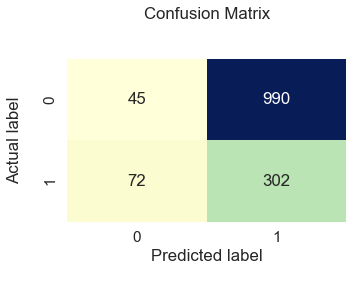



              precision    recall  f1-score   support

           0       0.38      0.04      0.08      1035
           1       0.23      0.81      0.36       374

    accuracy                           0.25      1409
   macro avg       0.31      0.43      0.22      1409
weighted avg       0.34      0.25      0.15      1409
 

            model_name     acc  precision  recall      f1      f2
0  Logistic Regression  0.2463     0.2337  0.8075  0.3625  0.5416


In [96]:
model_metrics(model_performance_after_hypertuning, 'Logistic Regression', y_tester, pred_1, True, True)

print(model_performance_after_hypertuning.tail(1))


In [99]:
linear_SVC = SVC(kernel = 'linear', random_state = 42)

param_dist = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

linear_SVC_hp =  RandomizedSearchCV(linear_SVC, param_distributions = param_dist , scoring = F2_score , cv = 5, random_state= 42)
result2 = linear_SVC_hp.fit(x_trainer, y_trainer)

In [101]:
print(result2.best_estimator_)

pred_2 = result2.predict(x_tester)

SVC(C=100.0, kernel='linear', random_state=42)


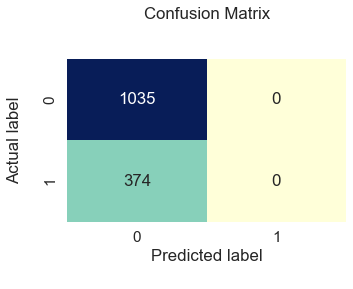



              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409
 

   model_name     acc  precision  recall   f1   f2
1  Linear SVC  0.7346        0.0     0.0  0.0  0.0


In [103]:
model_metrics(model_performance_after_hypertuning, 'Linear SVC', y_tester, pred_2, True, True)

print(model_performance_after_hypertuning.tail(1))

In [104]:
f2_score_list = []
# odd number of neighbours help in better classification in knn, if even neighbours are given then there can be draw between the number of neighbours supporting each class.
neighbors = [x for x in range(1,40) if x % 2 != 0]
print("K-Neighbours considered are :",neighbors)
for i in neighbors:
 knn = KNeighborsClassifier(n_neighbors=i)
 cross_val_scr = cross_val_score(knn, x_trainer, y_trainer, scoring = F2_score, cv=5)
 f2_score_list.append(cross_val_scr.mean())

K-Neighbours considered are : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


Max F2 score:- 0.5678696315291303 at K = 39


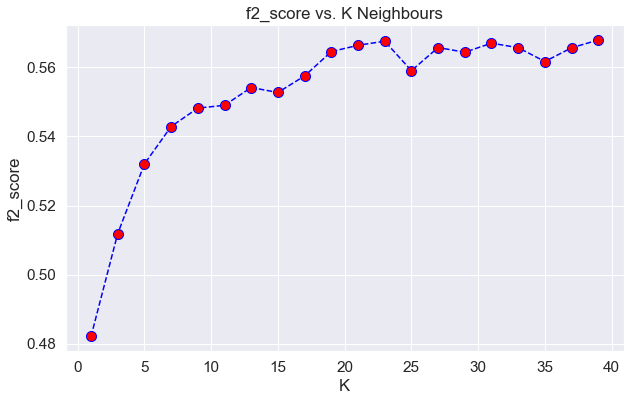

In [105]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,f2_score_list,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('f2_score vs. K Neighbours')
plt.xlabel('K')
plt.ylabel('f2_score')
max_index = f2_score_list.index(max(f2_score_list))
max_index = neighbors[max_index]
print("Max F2 score:-",max(f2_score_list),"at K =",max_index)

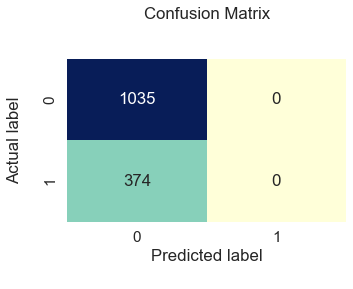



              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409
 



,model_name,acc,precision,recall,f1,f2
2,KNN,0.7346,0.0,0.0,0.0,0.0


In [106]:
knn = KNeighborsClassifier(n_neighbors=31)
KNN = knn.fit(x_trainer, y_trainer)
pred_4 = KNN.predict(x_tester)

model_metrics(model_performance_after_hypertuning, 'KNN', y_tester, pred_4, True, True)

model_performance_after_hypertuning.tail(1)

# In Conclusion 
### I have ran 5 quick models to decide and prove the legitmiacy of my claim searching for the F2 to reduce the claims of false negitives. 
as we can see we are running at an mean acc of around 0.73 so not horriable but it gives us a derection to go in. 

I would recomend building on the Linear SVC, Random Forest, Kernal SVC models to try to perfect them. and if i had more time Logistic regression i feel like i could rework that and try to get some diffrent results.